In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import pandas as pd
import statsmodels.api as sm
import matplotlib

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
 
from itertools import product
from tqdm import tqdm_notebook

import Model_Evaluation as me

In [2]:
sales = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/src/Data_Prep/weekly_sales.csv', index_col= 0)
sales

,Date,Sum of Sales
0,2008-01-02,14056.71
1,2008-01-09,83186.90
2,2008-01-16,68677.08
3,2008-01-23,50831.96
4,2008-01-30,41464.02
...,...,...
676,2020-12-16,142664.93
677,2020-12-23,113317.38
678,2020-12-30,33999.37
679,2021-01-06,130181.44


In [3]:
train,test = train_test_split(sales, test_size=0.075, random_state=60616, shuffle=False)
test.shape

(52, 2)

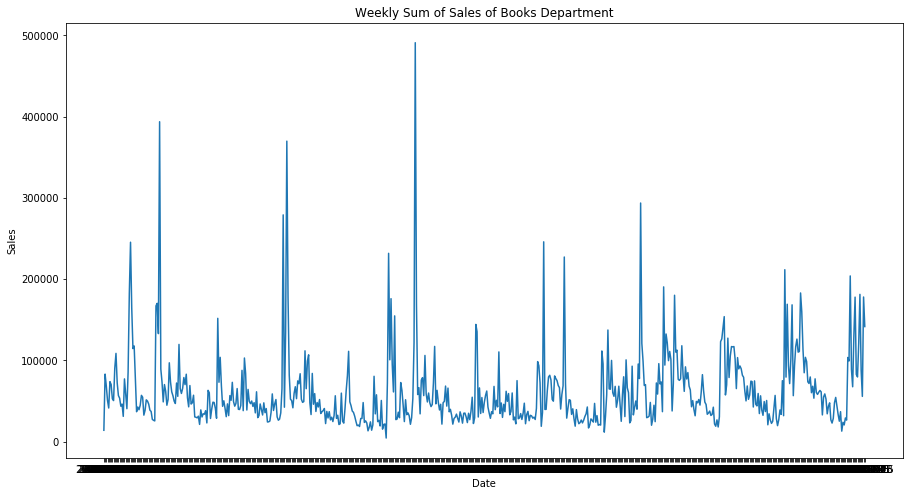

In [4]:
plt.figure(figsize=[15,8])
plt.plot(train['Date'],train['Sum of Sales'])
plt.title('Weekly Sum of Sales of Books Department')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [5]:
ad_fuller_result = adfuller(train['Sum of Sales'])
print(f'p-value: {ad_fuller_result[1]}')

p-value: 1.0976700353911296e-15


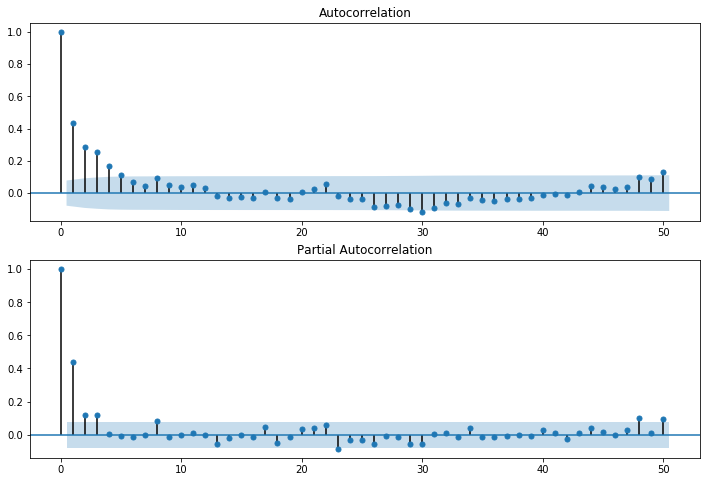

In [6]:
fig, ax = plt.subplots(2,1, figsize= (12,8))
fig = sm.graphics.tsa.plot_acf(train['Sum of Sales'], lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(train['Sum of Sales'], lags=50, ax=ax[1])
plt.show()

In [ ]:
p = [0,1,2]
d = [0,1]
q = [0,1,2]
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

df = pd.DataFrame()
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['Sum of Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal)
            results = mod.fit()
            print('ARIMA{}x{}- AIC:{}'.format(param, param_seasonal, results.aic))

            combo = [(param,param_seasonal,results.aic)]
            df = df.append(combo)
            print(" ")
        except:
            continue
df.columns = ['param','param_seasonal', 'AIC']

ARIMA(0, 0, 0)x(0, 0, 0, 52)- AIC:15944.009903103666
 
ARIMA(0, 0, 0)x(0, 0, 1, 52)- AIC:15781.513638283388
 
ARIMA(0, 0, 0)x(0, 0, 2, 52)- AIC:15708.87334300121
 
ARIMA(0, 0, 0)x(0, 1, 0, 52)- AIC:14321.15937981863
 
ARIMA(0, 0, 0)x(0, 1, 1, 52)- AIC:14041.496515387109
 
ARIMA(0, 0, 0)x(0, 1, 2, 52)- AIC:14016.791934319644
 
ARIMA(0, 0, 0)x(1, 0, 0, 52)- AIC:15566.857147857485
 
ARIMA(0, 0, 0)x(1, 0, 1, 52)- AIC:15394.023122607992
 
ARIMA(0, 0, 0)x(1, 0, 2, 52)- AIC:15406.045298048988
 
ARIMA(0, 0, 0)x(1, 1, 0, 52)- AIC:14100.800899915354
 
ARIMA(0, 0, 0)x(1, 1, 1, 52)- AIC:14027.977450949398
 
ARIMA(0, 0, 0)x(1, 1, 2, 52)- AIC:14034.28422731857
 
ARIMA(0, 0, 0)x(2, 0, 0, 52)- AIC:15454.551842690082
 
ARIMA(0, 0, 0)x(2, 0, 1, 52)- AIC:15397.069070676334
 
ARIMA(0, 0, 0)x(2, 0, 2, 52)- AIC:15417.239246412944
 
ARIMA(0, 0, 0)x(2, 1, 0, 52)- AIC:14068.173001011059
 
ARIMA(0, 0, 0)x(2, 1, 1, 52)- AIC:14022.609658175526
 
ARIMA(0, 0, 0)x(2, 1, 2, 52)- AIC:14035.450523521084
 
ARIMA(0, 0, 1

D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(1, 0, 1, 52)- AIC:15185.22907049077
 
ARIMA(2, 0, 1)x(1, 0, 2, 52)- AIC:15190.131016643121
 
ARIMA(2, 0, 1)x(1, 1, 0, 52)- AIC:14086.206297171873
 
ARIMA(2, 0, 1)x(1, 1, 1, 52)- AIC:14020.07133066574
 
ARIMA(2, 0, 1)x(1, 1, 2, 52)- AIC:14022.173002357064
 
ARIMA(2, 0, 1)x(2, 0, 0, 52)- AIC:15191.933958846283
 
ARIMA(2, 0, 1)x(2, 0, 1, 52)- AIC:15189.135669542939
 


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(2, 0, 2, 52)- AIC:15194.329901818686
 
ARIMA(2, 0, 1)x(2, 1, 0, 52)- AIC:14051.321632936193
 
ARIMA(2, 0, 1)x(2, 1, 1, 52)- AIC:14021.966810065369
 
ARIMA(2, 0, 1)x(2, 1, 2, 52)- AIC:14023.7012719981
 
ARIMA(2, 0, 2)x(0, 0, 0, 52)- AIC:15183.0886901458
 
ARIMA(2, 0, 2)x(0, 0, 1, 52)- AIC:15182.797152784426
 


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 0, 2, 52)- AIC:15183.956012877446
 
ARIMA(2, 0, 2)x(0, 1, 0, 52)- AIC:14251.968245861204
 
ARIMA(2, 0, 2)x(0, 1, 1, 52)- AIC:14022.974983683329
 
ARIMA(2, 0, 2)x(0, 1, 2, 52)- AIC:14026.13371071959
 
ARIMA(2, 0, 2)x(1, 0, 0, 52)- AIC:15182.587130013833
 


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 1, 52)- AIC:15179.266491412222
 


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(1, 0, 2, 52)- AIC:15180.614020479472
 
ARIMA(2, 0, 2)x(1, 1, 0, 52)- AIC:14089.05829620595
 
ARIMA(2, 0, 2)x(1, 1, 1, 52)- AIC:14026.280099932981
 
ARIMA(2, 0, 2)x(1, 1, 2, 52)- AIC:14028.463520411577
 


D:\anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(2, 0, 0, 52)- AIC:15183.429248458633
 
ARIMA(2, 0, 2)x(2, 0, 1, 52)- AIC:15181.77709061252
 
ARIMA(2, 0, 2)x(2, 1, 0, 52)- AIC:14058.491157215478
 
ARIMA(2, 0, 2)x(2, 1, 1, 52)- AIC:14027.903671659955
 
ARIMA(2, 0, 2)x(2, 1, 2, 52)- AIC:14029.94769966177
 
ARIMA(2, 1, 0)x(0, 0, 0, 52)- AIC:15226.679376517382
 
ARIMA(2, 1, 0)x(0, 0, 1, 52)- AIC:15227.484517542056
 
ARIMA(2, 1, 0)x(0, 0, 2, 52)- AIC:15229.087258668407
 
ARIMA(2, 1, 0)x(0, 1, 0, 52)- AIC:14319.561285347796
 
ARIMA(2, 1, 0)x(0, 1, 1, 52)- AIC:14086.394740179418
 
ARIMA(2, 1, 0)x(0, 1, 2, 52)- AIC:14086.912120831845
 
ARIMA(2, 1, 0)x(1, 0, 0, 52)- AIC:15227.415997802967
 
ARIMA(2, 1, 0)x(1, 0, 1, 52)- AIC:15226.346043599464
 
ARIMA(2, 1, 0)x(1, 0, 2, 52)- AIC:15228.336959436789
 
ARIMA(2, 1, 0)x(1, 1, 0, 52)- AIC:14158.91523902854
 
ARIMA(2, 1, 0)x(1, 1, 1, 52)- AIC:14087.01626640836
 
ARIMA(2, 1, 0)x(1, 1, 2, 52)- AIC:14088.626822736782
 
ARIMA(2, 1, 0)x(2, 0, 0, 52)- AIC:15228.887350521964
 
ARIMA(2, 1, 0)

In [7]:
mod = sm.tsa.statespace.SARIMAX(train['Sum of Sales'],
                                order=(0, 0, 2),
                                seasonal_order=(2, 1, 2, 52))
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                       Sum of Sales   No. Observations:                  629
Model:             SARIMAX(0, 0, 2)x(2, 1, 2, 52)   Log Likelihood               -7013.299
Date:                            Mon, 05 Apr 2021   AIC                          14040.598
Time:                                    16:48:47   BIC                          14071.103
Sample:                                         0   HQIC                         14052.494
                                            - 629                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3215      0.067      4.780      0.000       0.190       0.453
ma.L2          0.0687      0.053   

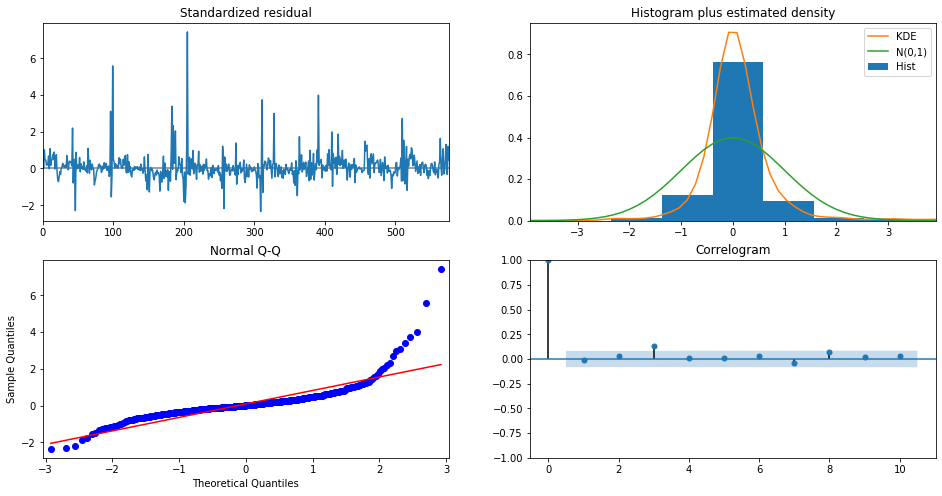

In [8]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

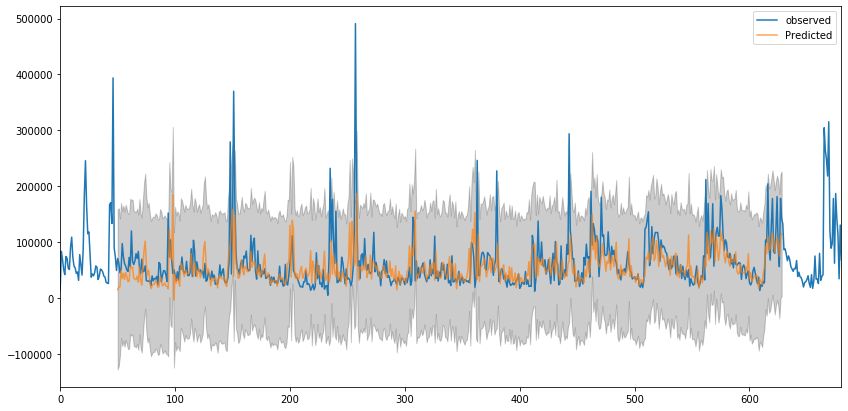

In [9]:
#Point from which prediction starts
start_point = 50
pred = results.get_prediction(start=start_point)
pred_ci = pred.conf_int()
ax = sales['Sum of Sales'].plot(label='observed',)
pred.predicted_mean.plot(ax=ax, label='Predicted', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
plt.show()

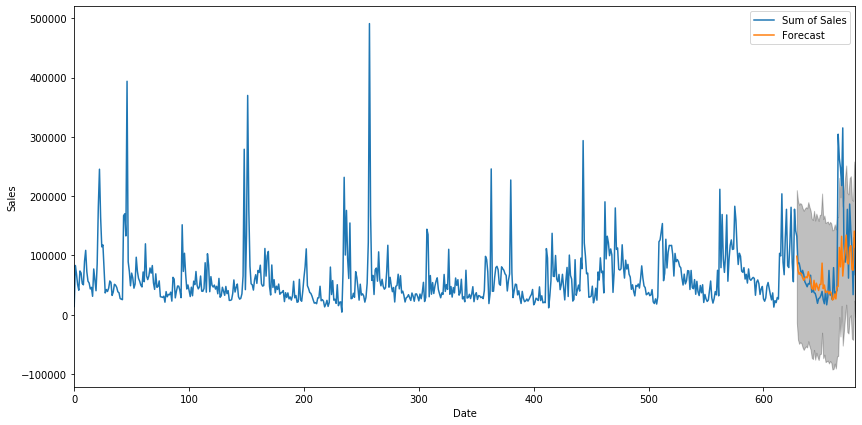

In [11]:
pred_uc = results.get_forecast(steps=52)
pred_ci = pred_uc.conf_int()
ax = sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [12]:
predictions = pred.predicted_mean
actual = train['Sum of Sales'][start_point:]
me.evaluate_model(predictions,actual)

			Model Performance

Mean Absolute Percentage Error: 0.45930058424015885

Mean Absolute Error: 24095.552266478055

BIAS: 5756.878978394045

Mean Squared Error: 19189018576.115772

Root Mean Squared Error: 138524.4331376807


In [14]:
test_prediction = results.forecast(steps=52)
test_actual = test['Sum of Sales']
me.evaluate_model(test_prediction,test_actual)

			Model Performance

Mean Absolute Percentage Error: 0.4395034384255242

Mean Absolute Error: 36917.31670135849

BIAS: 16117.78634397073

Mean Squared Error: 13508717904.754246

Root Mean Squared Error: 116227.01022031947
